## Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

CONSTANT_SEED = 100

## Set Up Import Data Set

In [2]:
#Import data frame
main_heart_df = pd.read_csv('heart.csv')
main_heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Delete a single row by index value 449 - As shown in EDA
main_heart_df = main_heart_df.drop(labels=449, axis=0).reset_index(drop=True)

## Creating DataFrames for zero/mean/median imputation with outliers


#### Creating Zero Imputation Dataframe


In [4]:
# For zero imputation : IPzero_heart_df 
#main_heart_df already is already imputed with Zero values. 
IPzero_heart_df = main_heart_df.copy()

#### Creating Mean Imputation Dataframe

In [5]:
# For mean imputation : IPmean_heart_df
# Replacing '0' values in cholestrol column with mean value

# New dataframe IPmean_heart_df
IPmean_heart_df = main_heart_df.copy()

# create SimpleImputer object
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# fit imputer to 'cholesterol' column
imputer.fit(IPmean_heart_df[['Cholesterol']])

# transform 'cholesterol' column by replacing 0 with mean value
IPmean_heart_df['Cholesterol'] = imputer.transform(IPmean_heart_df[['Cholesterol']])

mean_value = imputer.statistics_[0]
# Print the mean value
print('Mean value of Cholesterol column:', mean_value)

Mean value of Cholesterol column: 244.6353887399464


#### Creating Median Imputation Dataframe

In [6]:
# For median imputation : IPmedian_heart_df
# Replacing '0' values in cholestrol column with median value

# New dataframe IPmean_heart_df
IPmedian_heart_df = main_heart_df.copy()

# create SimpleImputer object
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

# fit imputer to 'cholesterol' column
imputer.fit(IPmedian_heart_df[['Cholesterol']])

# transform 'cholesterol' column by replacing 0 with mean value
IPmedian_heart_df['Cholesterol'] = imputer.transform(IPmedian_heart_df[['Cholesterol']])

median_value = imputer.statistics_[0]
# Print the median value
print('Median value of Cholesterol column:', median_value)

Median value of Cholesterol column: 237.0


## Creating DataFrames for zero/mean/median imputation without outliers




#### Defining outliers Function

In [7]:
# define a function called "outliers" which returns a list of outliers 
# IQR = Q3-Q1
# +/- 1.5* IQR

def outliers(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns
    
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)
    
    return df.loc[~outlier_mask, :]

#### Defining num_outlier Function

In [8]:
# define a fucntion to print the number of outliers called "num_outliers".
def num_outliers(df):
    count = 0
    for var in numDF:
        Q1 = numDF[var].quantile(0.25)
        Q3 = numDF[var].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1 - 1.5 * IQR
        upper_lim = Q3 + 1.5 * IQR
        outliers_low = (numDF[var] < lower_lim)
        outliers_up = (numDF[var] > upper_lim)
    
        print('Number of Outliers in %s is :' %(var),len(numDF[var][outliers_low]) + len(numDF[var][outliers_up]))
        print("")
        count += 1
    
    return

#### Creating Zero Imputation without outliers Dataframe

In [9]:
# Deleting Outliers and creating new Dataframe IPzero_N0_outliers_heart_df
IPzero_N0_outliers_heart_df = IPzero_heart_df.copy()

IPzero_N0_outliers_heart_df = outliers(IPzero_N0_outliers_heart_df).reset_index(drop=True)

# creating numDF to visualise
numDF = pd.DataFrame(IPzero_N0_outliers_heart_df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])

# Remaining Outliers
num_outliers(numDF)

Number of Outliers in Age is : 0

Number of Outliers in RestingBP is : 0

Number of Outliers in Cholesterol is : 8

Number of Outliers in MaxHR is : 0

Number of Outliers in Oldpeak is : 0



#### Creating Mean Imputation without outliers Dataframe

In [10]:
IPmean_N0_outliers_heart_df = IPmean_heart_df.copy()

# For mean imputation : IPmean_N0_outliers_heart_df

# Deleting Outliers and creating new Dataframe IPmean_N0_outliers_heart_df    
IPmean_N0_outliers_heart_df = outliers(IPmean_N0_outliers_heart_df).reset_index(drop=True)

# creating numDF to visualise
numDF = pd.DataFrame(IPmean_N0_outliers_heart_df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])

# Remaining Outliers
num_outliers(numDF)

Number of Outliers in Age is : 0

Number of Outliers in RestingBP is : 0

Number of Outliers in Cholesterol is : 0

Number of Outliers in MaxHR is : 0

Number of Outliers in Oldpeak is : 0



#### Creating Median Imputation without outliers Dataframe

In [11]:
# For median imputation : IPmedian_N0_outliers_heart_df
IPmedian_N0_outliers_heart_df = IPmedian_heart_df.copy()

# Deleting Outliers and creating new Dataframe IPmedian_N0_outliers_heart_df    
IPmedian_N0_outliers_heart_df = outliers(IPmedian_N0_outliers_heart_df).reset_index(drop=True)

# creating numDF to visualise
numDF = pd.DataFrame(IPmedian_N0_outliers_heart_df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])


# Print no of outliers
num_outliers(numDF)

Number of Outliers in Age is : 0

Number of Outliers in RestingBP is : 0

Number of Outliers in Cholesterol is : 0

Number of Outliers in MaxHR is : 0

Number of Outliers in Oldpeak is : 0



### Defining Helper function for One Hot encoder

In [12]:
# This function one hot encodes the the features in the different dataframes and returns the one hot encoded Dataframe
def return_ohe(df):
    # Initialize encoder
    ohe = OneHotEncoder()

    # OneHotEncoding of categorical predictors (not the response)
    main_heart_df_cat = df[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
    ohe.fit(main_heart_df_cat)
    main_heart_df_cat_ohe = pd.DataFrame(ohe.transform(main_heart_df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(main_heart_df_cat.columns))
    # Combining Numeric features with the OHE Categorical features
    main_heart_df_num = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
    main_heart_df_res = df['HeartDisease']
    main_heart_df_ohe = pd.concat([main_heart_df_num, main_heart_df_cat_ohe, main_heart_df_res], 
                           sort = False, axis = 1).reindex(index=main_heart_df_num.index)

    # Check the final dataframe
    #main_heart_df_ohe.info()
    
    return main_heart_df_ohe

### Defining Helper function to Output Random Forest Tree

In [13]:
# This function takes in the One Hot encoded Dataframe, Number of Trees and Depth of Trees parameters 
# and outputs the confusion matrix and gini importance for each feature in the model
def output_tree(ohe, trees, depth):
    # Extract Response and Predictors
    y = pd.DataFrame(ohe['HeartDisease'])
    X = pd.DataFrame(ohe.drop('HeartDisease', axis = 1))

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = CONSTANT_SEED)

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = trees,  # n_estimators denote number of trees
                                     max_depth = depth,     # set the maximum depth of each tree
                                     random_state = CONSTANT_SEED)       

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.HeartDisease.ravel())

    # Predict the Response corresponding to Predictors
    y_train_pred = rforest.predict(X_train)
    
    # Predict the Response corresponding to Predictors
    y_test_pred = rforest.predict(X_test)
    
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1 = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    ax1.set_title("Confusion Matrix for Training Data")
    
    ax2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
    ax2.set_title("Confusion Matrix for Test Data")
    plt.show()

    # Print the Classification Report
    print("Classification Report\n")
    print("Train Data")
    print(classification_report(y_train,y_train_pred))
    print('---------------------------------------------')
    print()
    # Print the Classification Accuracy
    print("Test Data")
    print(classification_report(y_test,y_test_pred))
    print()
    
    # Get the Gini importance of all features
    importances = rforest.feature_importances_

    # Create a dataframe to store the Gini importance of each feature
    gini_df = pd.DataFrame({'feature': X_train.columns, 'gini_importance': importances})

    # Sort the features by their Gini importance in descending order
    gini_df = gini_df.sort_values('gini_importance', ascending=False)

    # Create a bar plot of the Gini importance of each feature
    plt.bar(gini_df['feature'], gini_df['gini_importance'])
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Gini Importance')
    plt.title('Gini Importance of Each Feature')
    plt.show()

### Defining Helper function to find the Best Model found through GridSearchCV

In [14]:
def cv_output_tree(ohe_df):

    # Extract Response and Predictors
    y = pd.DataFrame(ohe_df['HeartDisease'])
    X = pd.DataFrame(ohe_df.drop('HeartDisease', axis = 1))

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = CONSTANT_SEED)

    # Define the Hyper-parameter Grid to search on, in case of Random Forest
    param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
                  'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

    # Create the Hyper-parameter Grid
    hpGrid = GridSearchCV(RandomForestClassifier(random_state = CONSTANT_SEED),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'f1')       # score to evaluate

    # Train the models using Cross-Validation
    hpGrid.fit(X_train, y_train.HeartDisease.ravel())

    # Fetch the best Model or the best set of Hyper-parameters
    print("Best estimator for Number of Trees:\t", hpGrid.best_estimator_.n_estimators)
    print("Best estimator for Max Depth:\t\t", hpGrid.best_estimator_.max_depth)

    # Print the score (accuracy) of the best Model after CV
    print(np.abs(hpGrid.best_score_))

    output_tree(ohe_df, hpGrid.best_estimator_.n_estimators, hpGrid.best_estimator_.max_depth)

### Model 1: IPzero_heart_df (Zero imputation / With outliers)

Best estimator for Number of Trees:	 100
Best estimator for Max Depth:		 9
0.886715534350305


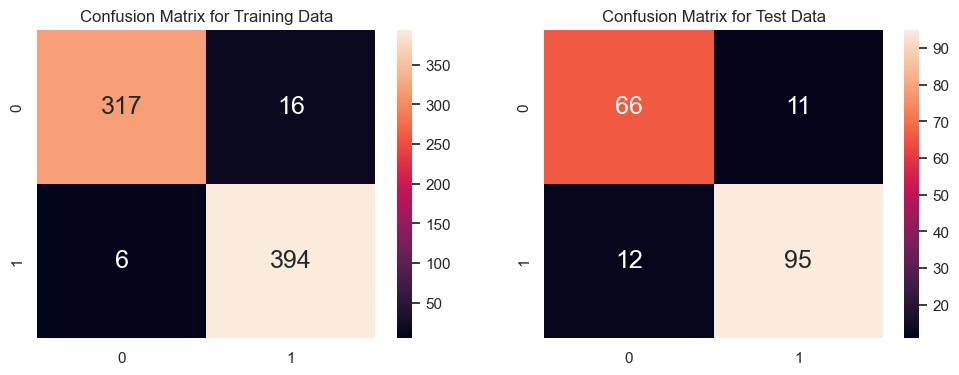

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       333
           1       0.96      0.98      0.97       400

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184




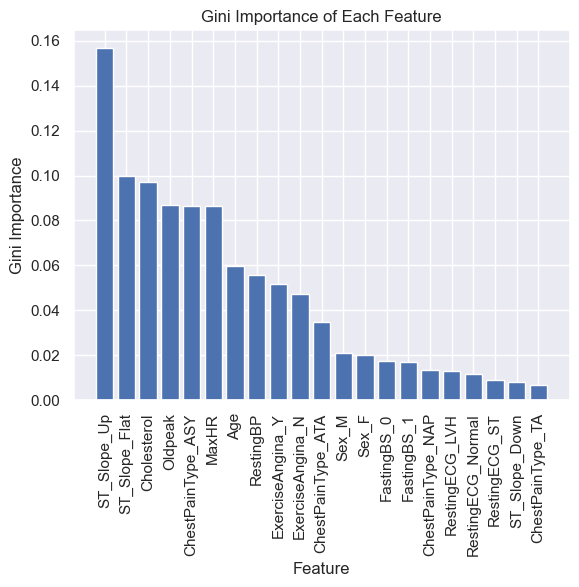

In [15]:
ohe_zero = return_ohe(IPzero_heart_df)
cv_output_tree(ohe_zero)

### Model 2: IPmean_heart_df (Mean imputation / With outliers)

Best estimator for Number of Trees:	 100
Best estimator for Max Depth:		 6
0.8719622396006214


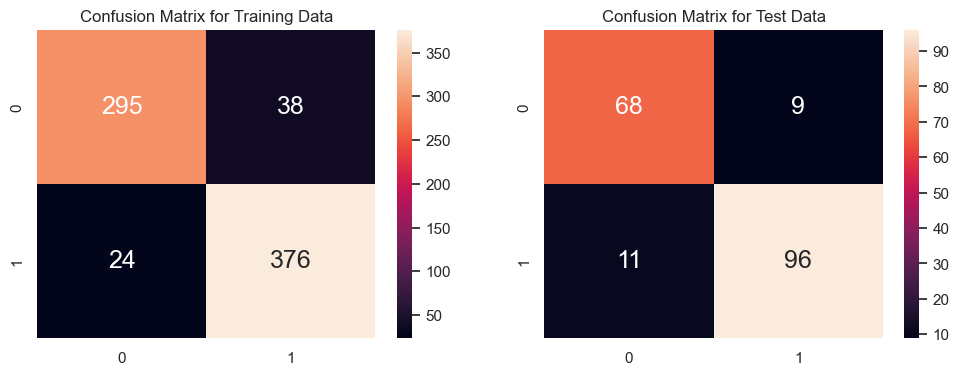

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       333
           1       0.91      0.94      0.92       400

    accuracy                           0.92       733
   macro avg       0.92      0.91      0.91       733
weighted avg       0.92      0.92      0.92       733

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184




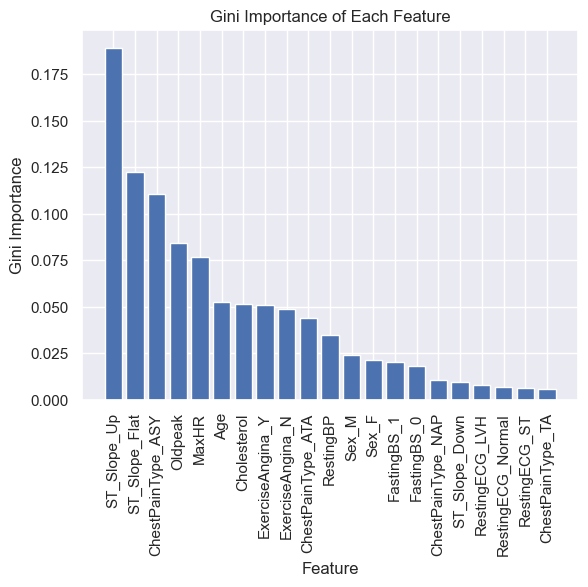

In [16]:
ohe_mean = return_ohe(IPmean_heart_df)
cv_output_tree(ohe_mean)

### Model 3: IPmedian_heart_df (Median imputation / With outliers)¶

Best estimator for Number of Trees:	 100
Best estimator for Max Depth:		 7
0.8734190402753799


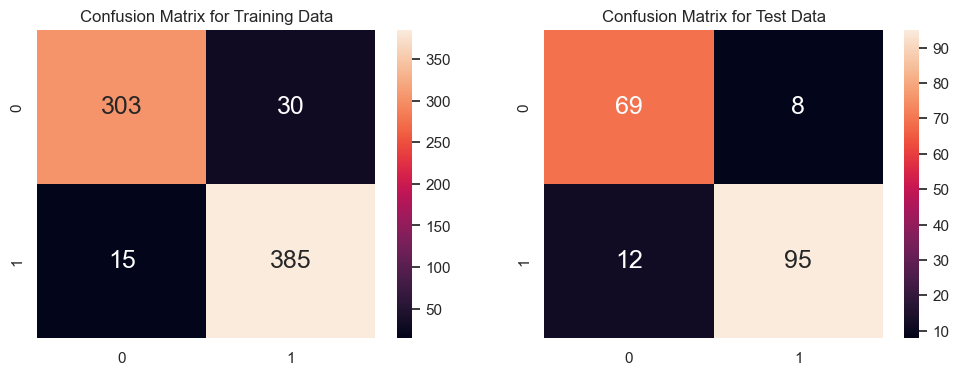

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       333
           1       0.93      0.96      0.94       400

    accuracy                           0.94       733
   macro avg       0.94      0.94      0.94       733
weighted avg       0.94      0.94      0.94       733

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184




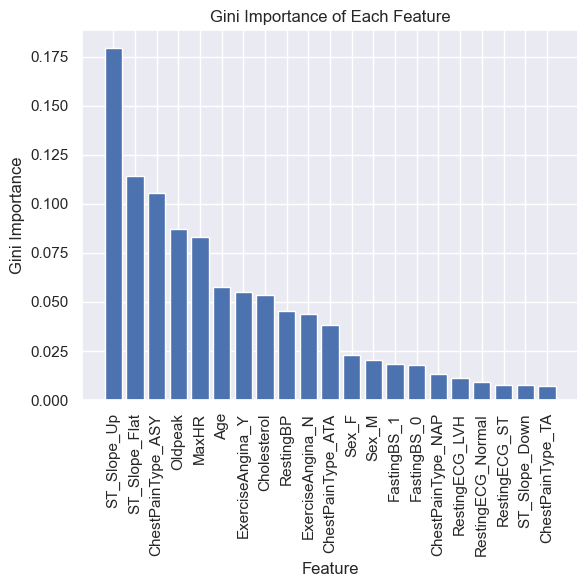

In [17]:
ohe_median = return_ohe(IPmedian_heart_df)
cv_output_tree(ohe_median)

### Model 4: IPzero_N0_outliers_heart_df (No imputation / Without outliers)¶

Best estimator for Number of Trees:	 100
Best estimator for Max Depth:		 6
0.8393991106842511


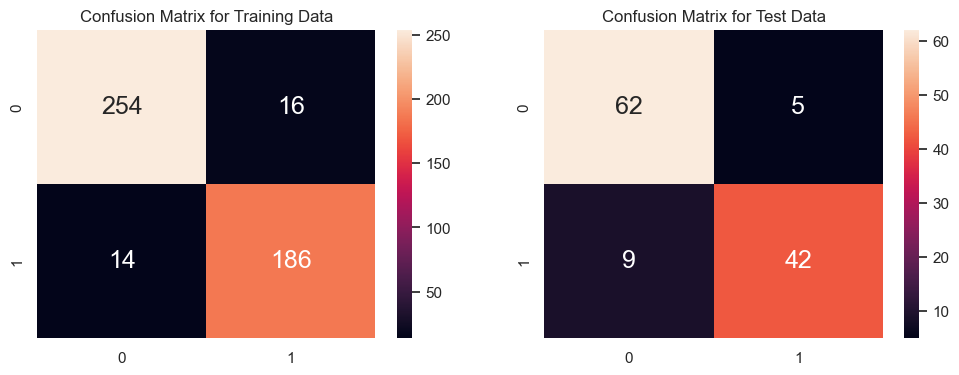

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       270
           1       0.92      0.93      0.93       200

    accuracy                           0.94       470
   macro avg       0.93      0.94      0.93       470
weighted avg       0.94      0.94      0.94       470

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        67
           1       0.89      0.82      0.86        51

    accuracy                           0.88       118
   macro avg       0.88      0.87      0.88       118
weighted avg       0.88      0.88      0.88       118




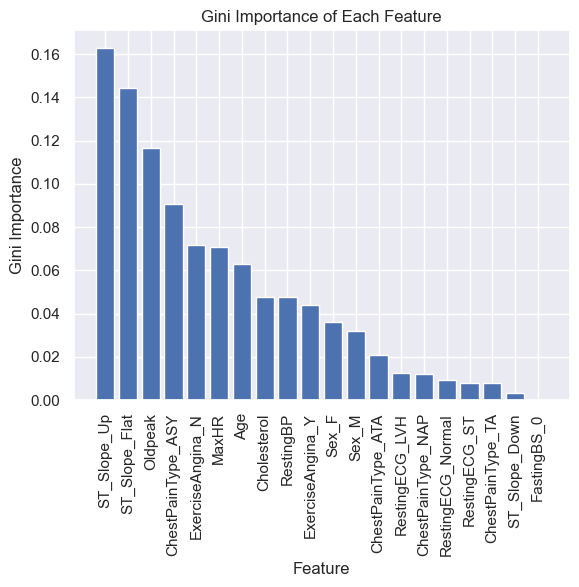

In [18]:
ohe_zero_n0 = return_ohe(IPzero_N0_outliers_heart_df)
cv_output_tree(ohe_zero_n0)

### Model 5: IPmean_N0_outliers_heart_df (Mean imputation / Without outliers)

Best estimator for Number of Trees:	 100
Best estimator for Max Depth:		 6
0.8602413493869443


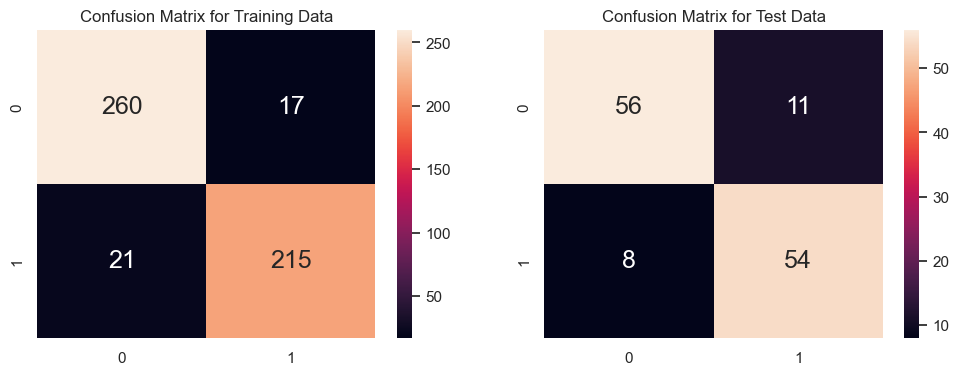

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       277
           1       0.93      0.91      0.92       236

    accuracy                           0.93       513
   macro avg       0.93      0.92      0.93       513
weighted avg       0.93      0.93      0.93       513

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.88      0.84      0.85        67
           1       0.83      0.87      0.85        62

    accuracy                           0.85       129
   macro avg       0.85      0.85      0.85       129
weighted avg       0.85      0.85      0.85       129




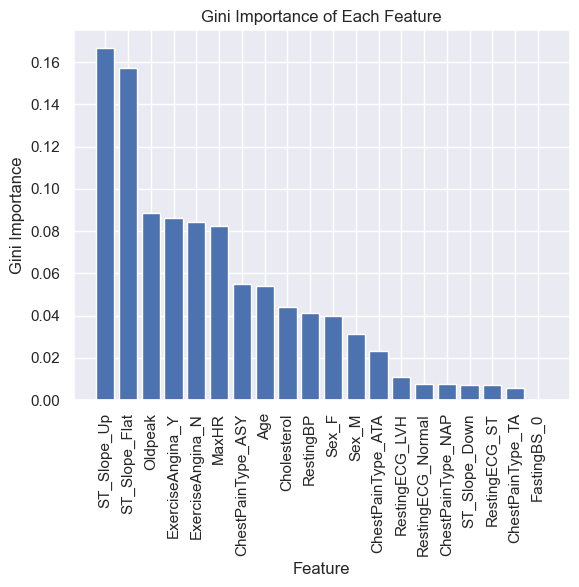

In [19]:
ohe_mean_n0 = return_ohe(IPmean_N0_outliers_heart_df)
cv_output_tree(ohe_mean_n0)

### Model 6: IPmedian_N0_outliers_heart_df (Median imputation / Without outliers)

Best estimator for Number of Trees:	 300
Best estimator for Max Depth:		 4
0.8583456240706353


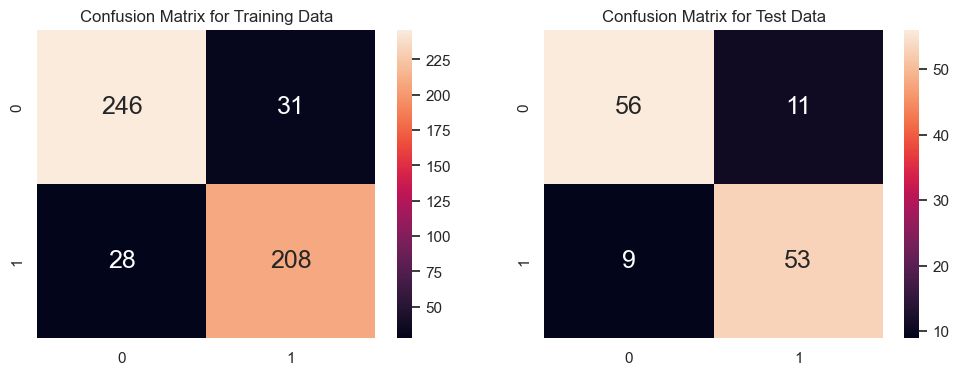

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       277
           1       0.87      0.88      0.88       236

    accuracy                           0.88       513
   macro avg       0.88      0.88      0.88       513
weighted avg       0.89      0.88      0.89       513

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        67
           1       0.83      0.85      0.84        62

    accuracy                           0.84       129
   macro avg       0.84      0.85      0.84       129
weighted avg       0.85      0.84      0.85       129




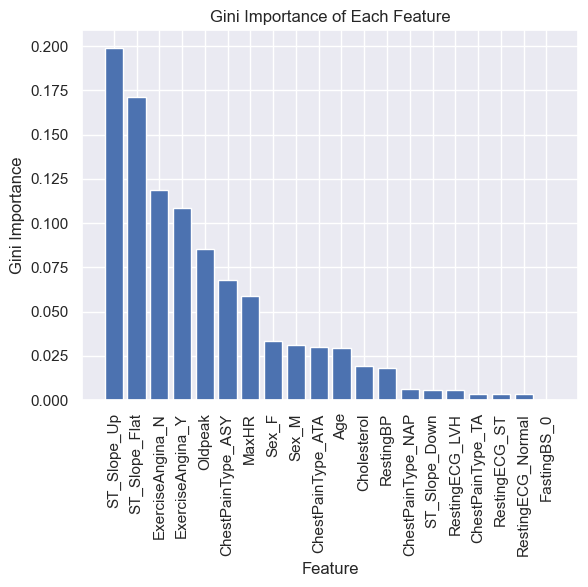

In [20]:
ohe_median_n0 = return_ohe(IPmedian_N0_outliers_heart_df)
cv_output_tree(ohe_median_n0)

### Classification Report Across All Models

#### Comparison using macro average of Test Data

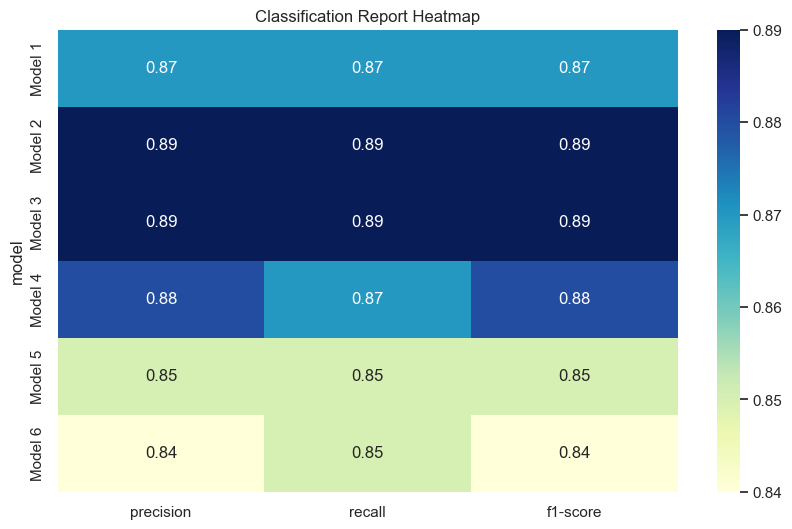

In [21]:
# create a list of all the classification reports using the macro avg

reports = [
    {'model': 'Model 1', 'precision': 0.87, 'recall': 0.87, 'f1-score': 0.87},
    {'model': 'Model 2', 'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89},
    {'model': 'Model 3', 'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89},
    {'model': 'Model 4', 'precision': 0.88, 'recall': 0.87, 'f1-score': 0.88},
    {'model': 'Model 5', 'precision': 0.85, 'recall': 0.85, 'f1-score': 0.85},
    {'model': 'Model 6', 'precision': 0.84, 'recall': 0.85, 'f1-score': 0.84}
]

# create a dataframe from the classification reports
df = pd.DataFrame(reports)

# set the model column as the index
df.set_index('model', inplace=True)

# create a heatmap using seaborn
plt.figure(figsize=(10,6))
sb.heatmap(df, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

MODEL 1 : Zero Imputation

MODEL 2 : Mean Imputation

MODEL 3 : Median Imputation

MODEL 4 : Zero Imputation without Outliers

MODEL 5 : Mean Imputation without Outliers

MODEL 6 : Median Imputation without Outliers

### Evaluation

Upon comparing the scores using macro average, we can observe that Models 2 and 3 (mean and median imputation, respectively) has the same score and both models obtained the **highest scores among all the models**. Which suggests that **imputing missing values with the mean or median of the available data can have a significant impact** on the model's accuracy and generalization.

Let's try to compare the weighted average instead to determine whether we can narrow it to **one** best model.

#### Comparison using weighted average of Test Data

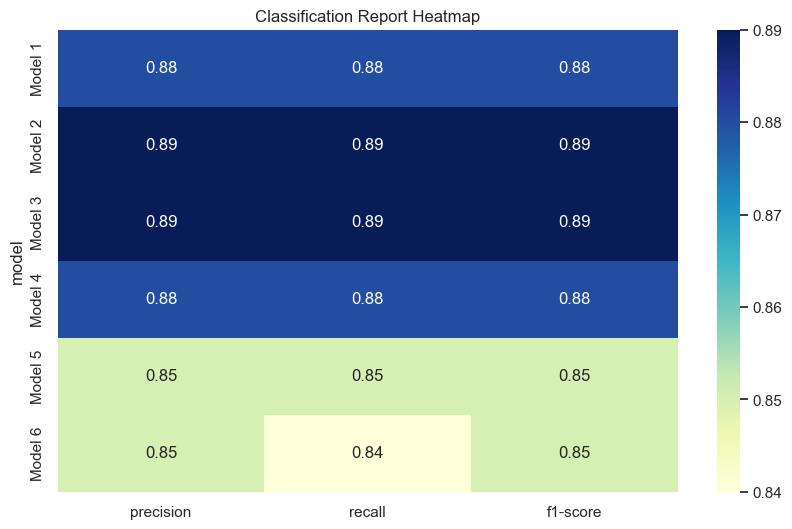

In [22]:
# create a list of all the classification reports using the weighted avg

reports = [
    {'model': 'Model 1', 'precision': 0.88, 'recall': 0.88, 'f1-score': 0.88},
    {'model': 'Model 2', 'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89},
    {'model': 'Model 3', 'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89},
    {'model': 'Model 4', 'precision': 0.88, 'recall': 0.88, 'f1-score': 0.88},
    {'model': 'Model 5', 'precision': 0.85, 'recall': 0.85, 'f1-score': 0.85},
    {'model': 'Model 6', 'precision': 0.85, 'recall': 0.84, 'f1-score': 0.85}
]

# create a dataframe from the classification reports
df = pd.DataFrame(reports)

# set the model column as the index
df.set_index('model', inplace=True)

# create a heatmap using seaborn
plt.figure(figsize=(10,6))
sb.heatmap(df, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

### Evaluation

Upon comparing the weighted average of the respective models, we still observe that Models 2 and 3 (mean and median imputation with outliers, respectively) has the same score both models obtained the **highest scores among all the models**. Which suggests that **imputing missing values with the mean or median of the available data can have a significant impact** on the model's accuracy and generalization.

This is followed by Models 1 and 4 (zero imputation with and without outliers, respectively) displaying the second lowest scores among all models. This suggests that zero imputation **may not be as effective as using mean and median imputation in improving the model's accuracy**

On the other hand, Models 5 and 6 (mean and median imputation without outliers, respectively) have lowest scores compared to all the other models, which may suggest that **removing outliers in mean and median imputation may not be as effective as imputing missing values in improving the model's accuracy**

Moving forward, we will use the **Learning Curve technique** to determine the better model between Model 2 and Model 3 and narrow down to **one** best model

### Defining the Learning Curve helper function to compare Models 2 and 3 ###

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def output_learning_curve(ohe, trees, depth):
    # Extract Response and Predictors
    y = pd.DataFrame(ohe['HeartDisease'])
    X = pd.DataFrame(ohe.drop('HeartDisease', axis = 1))
    
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=CONSTANT_SEED)

    # Reshape target variables to avoid DataConversionWarning
    y_train = y_train.values.ravel()
    y_val = y_val.values.ravel()

    # Initialize a random forest classifier
    rf = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=CONSTANT_SEED)
    
    # Train and evaluate the model on increasingly larger subsets of the training data
    train_acc, val_acc = [], []
    n_samples = len(X_train)
    for i in range(1, n_samples+1, 50):
        rf.fit(X_train[:i], y_train[:i])
        y_train_pred = rf.predict(X_train[:i])
        y_val_pred = rf.predict(X_val)
        train_acc.append(accuracy_score(y_train[:i], y_train_pred))
        val_acc.append(accuracy_score(y_val, y_val_pred))
        print("Number of training examples: %d | Validation Accuracy: %.3f" % (i, val_acc[-1]))
    
    # Plot the learning curve
    plt.plot(np.arange(1, n_samples+1, 50), train_acc, label='Training Accuracy')
    plt.plot(np.arange(1, n_samples+1, 50), val_acc, label='Validation Accuracy')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Using Learning Curve on Model 2 using best estimators found previously (100 Trees, 6 Max Depth)

Number of training examples: 1 | Validation Accuracy: 0.582
Number of training examples: 51 | Validation Accuracy: 0.804
Number of training examples: 101 | Validation Accuracy: 0.826
Number of training examples: 151 | Validation Accuracy: 0.880
Number of training examples: 201 | Validation Accuracy: 0.886
Number of training examples: 251 | Validation Accuracy: 0.891
Number of training examples: 301 | Validation Accuracy: 0.902
Number of training examples: 351 | Validation Accuracy: 0.913
Number of training examples: 401 | Validation Accuracy: 0.902
Number of training examples: 451 | Validation Accuracy: 0.908
Number of training examples: 501 | Validation Accuracy: 0.908
Number of training examples: 551 | Validation Accuracy: 0.918
Number of training examples: 601 | Validation Accuracy: 0.897
Number of training examples: 651 | Validation Accuracy: 0.891
Number of training examples: 701 | Validation Accuracy: 0.880


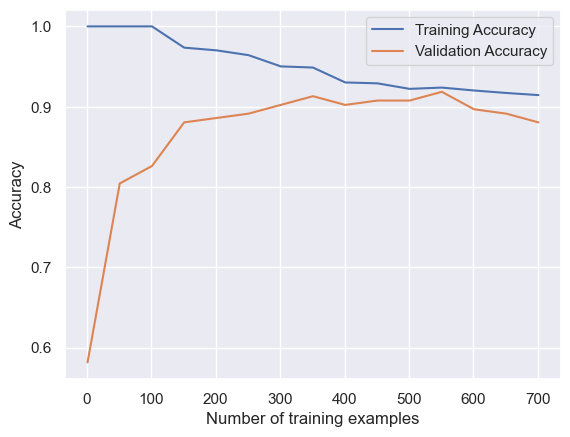

In [24]:
output_learning_curve(ohe_mean, 100, 6)

### Using Learning Curve on Model 3 using best estimators found previously (100 Trees, 7 Max Depth)

Number of training examples: 1 | Validation Accuracy: 0.582
Number of training examples: 51 | Validation Accuracy: 0.788
Number of training examples: 101 | Validation Accuracy: 0.826
Number of training examples: 151 | Validation Accuracy: 0.864
Number of training examples: 201 | Validation Accuracy: 0.886
Number of training examples: 251 | Validation Accuracy: 0.891
Number of training examples: 301 | Validation Accuracy: 0.897
Number of training examples: 351 | Validation Accuracy: 0.891
Number of training examples: 401 | Validation Accuracy: 0.913
Number of training examples: 451 | Validation Accuracy: 0.897
Number of training examples: 501 | Validation Accuracy: 0.918
Number of training examples: 551 | Validation Accuracy: 0.902
Number of training examples: 601 | Validation Accuracy: 0.908
Number of training examples: 651 | Validation Accuracy: 0.897
Number of training examples: 701 | Validation Accuracy: 0.886


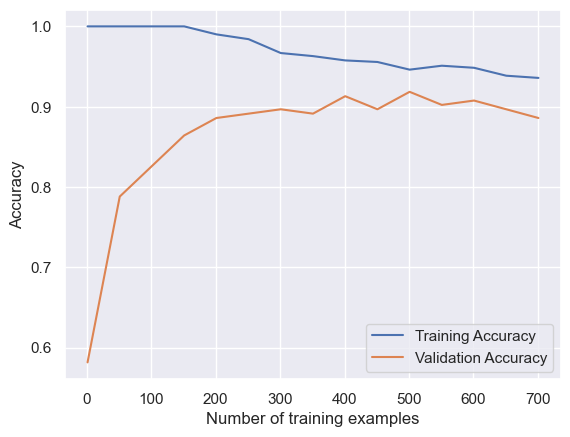

In [25]:
output_learning_curve(ohe_median, 100, 7)

## Evaluation

To compare the two models, you can look at the validation accuracy at the same number of training examples.

For example, at 101 training examples, Model 3 has a higher validation accuracy of 0.826 compared to Model 2's 0.821. This pattern continues for most of the training examples, with Model 3 having higher or equal validation accuracy compared to Model 2. Based on these results, it seems that Model 3 performs better than Model 2.

Thus **Model 3 is the best model across all imputation and within imputation, Median Imputation with Outliers**

## Feature pruning the best model


### Finding the most important features in the best model (Median Imputation with Outliers)

In [26]:
ohe_median = return_ohe(IPmedian_heart_df)
ohe_median.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,172,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180.0,156,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283.0,98,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,48,138,214.0,108,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,54,150,195.0,122,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


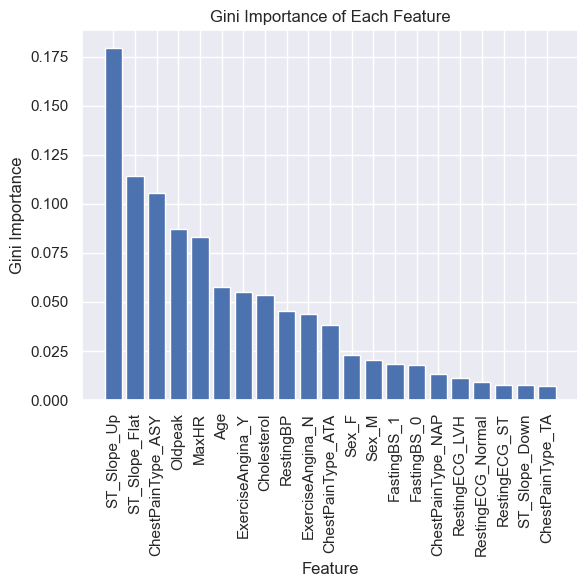

In [27]:
# Extract Response and Predictors
y = pd.DataFrame(ohe_median['HeartDisease'])
X = pd.DataFrame(ohe_median.drop('HeartDisease', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=CONSTANT_SEED)

# Define the hyperparameters for the Random Forest model
n_estimators = 100
max_depth = 7

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=CONSTANT_SEED)
rf.fit(X_train, y_train.values.ravel())

# Get the feature importances
importances = rf.feature_importances_

# Create a dataframe to store the Gini importance of each feature
gini_df = pd.DataFrame({'feature': X_test.columns, 'gini_importance': importances})

# Sort the features by their Gini importance in descending order
gini_df = gini_df.sort_values('gini_importance', ascending=False)

# Create a bar plot of the Gini importance of each feature
plt.bar(gini_df['feature'], gini_df['gini_importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Gini Importance')
plt.title('Gini Importance of Each Feature')
plt.show()

### Feature pruning Process

In [28]:
from sklearn import metrics

# Extract Response and Predictors
y = pd.DataFrame(ohe_median['HeartDisease'])
X = pd.DataFrame(ohe_median.drop('HeartDisease', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=CONSTANT_SEED)

# Train a random forest with fixed hyper-parameters
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=CONSTANT_SEED)
rf.fit(X_train, y_train.values.ravel())

# Get the F1 score of the decision tree with all the features
y_test_pred = rf.predict(X_test)
f1_score_all = metrics.f1_score(y_test, y_test_pred ,average='macro')

print("Initial Test Data")
print(classification_report(y_test, y_test_pred))
print(f"F1 score with all features: {f1_score_all:.4f}")
print('---------------------------------------------')
print()

# Create a list to store the F1 scores during pruning
f1_scores = [f1_score_all]

# Get the Gini importance of all features
importances = rf.feature_importances_

# Create a dataframe to store the Gini importance of each feature
gini_df = pd.DataFrame({'feature': X_test.columns, 'gini_importance': importances})

# Sort the features by Gini importance in ascending order
gini_df = gini_df.sort_values('gini_importance')

# Get the F1 score after removing features one by one until there are only 3 features left
while len(gini_df) > 3:
    # Fit the decision tree with the remaining features
    rf.fit(X_train[gini_df['feature']], y_train.values.ravel())

    # Get the F1 score on the test set
    y_test_pred = rf.predict(X_test[gini_df['feature']])
    f1_score = metrics.f1_score(y_test, y_test_pred, average='macro')

    # Remove the feature with the lowest Gini importance
    removed_feature = gini_df.iloc[0]['feature']
    gini_df = gini_df.drop(gini_df.index[0])
    print('---------------------------------------------')
    print(f'Removing feature: {removed_feature}')
    print('')

    # Get the classification report
    report = metrics.classification_report(y_test, y_test_pred)
    print(f'Classification report after removing feature:\n {report}')
    print(f"F1 score after removing {removed_feature}: {f1_score:.4f}")
    print()

    # Add the F1 score to a list
    f1_scores.append(f1_score)


Initial Test Data
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

F1 score with all features: 0.8891
---------------------------------------------

---------------------------------------------
Removing feature: ChestPainType_TA

Classification report after removing feature:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.91      0.91      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

F1 score after removing ChestPainType_TA: 0.8883

---------------------------------------------
Removing feature: ST_

### Printing the F1 score in a line plot 


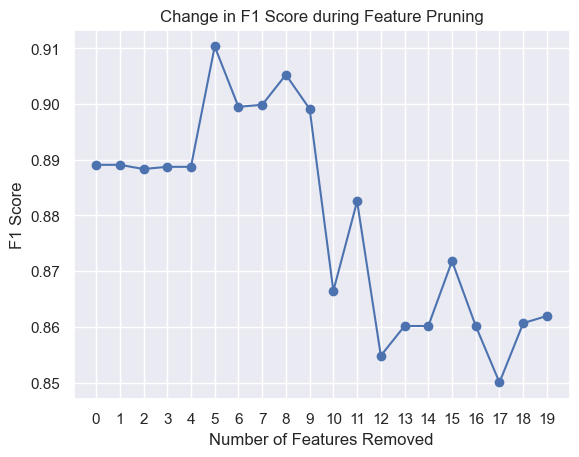

In [29]:
# Create a list of the x-axis values (number of remaining features)
x_values = list(range(len(f1_scores) + 1))

# Add the F1 score with all the features to the list
f1_scores = [f1_score_all] + f1_scores

# Create the line plot
plt.plot(x_values, f1_scores, marker='o')
plt.xticks(x_values)
plt.xlabel('Number of Features Removed')
plt.ylabel('F1 Score')
plt.title('Change in F1 Score during Feature Pruning')
plt.show()

## Evaluation

In order of events when we remove:
<br><br>
**'RestingECG_Normal'** (4th removed feature) we observe a significant **rise** in F1 score.
<br><br>
**'Sex_M'** (9th removed feature) we observe a significant **drop** in F1 score.
<br><br>
**'Sex_F'** (10th removed feature) we observe a significant **rise** in F1 score.
<br><br>
**'ChestPainType_ATA'** (11th removed feature) we observe a significant **drop** in F1 score.
<br><br>
This leaves us with 3 other features, namely **'ChestPainType_ASY'**, **'ST_Slope_Flat'** and **'ST_Slope_Up'** which still remain unremoved.
<br><br>
All sugesting following features of greater importance namely **'ChestPainType_ASY'** , **'ST_Slope_Flat'** and **'ST_Slope_Up'** are important features that might prove useful in determining if a patient have **'HeartDisease'**.

## Feature Conclusion

**'RestingECG_Normal'** , **'Sex_M'** , **'Sex_F'** , **'ChestPainType_ATA'** , **'ChestPainType_ASY'** , **'ST_Slope_Flat'** and **'ST_Slope_Up'** are the most important variables that might indicate a patient has **'HeartDisease'**

## Best Model with Best feature

In [30]:
def Best_Model_process(name_df):
    # One hot implementation
    ohe = OneHotEncoder()

    # Select the categorical columns to encode
    cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

    # Fit the encoder on the selected categorical columns
    ohe.fit(name_df[cat_cols])

    # One-hot encode the selected categorical columns
    name_df_cat_ohe = pd.DataFrame(ohe.transform(name_df[cat_cols]).toarray(),
                                   columns=ohe.get_feature_names_out(cat_cols))

    # Select the binary columns to keep
    bin_cols = ['RestingECG_Normal', 'Sex_M', 'Sex_F', 'ChestPainType_ATA',
                'ChestPainType_ASY', 'ST_Slope_Flat', 'ST_Slope_Up']

    # Combine the selected columns into a final DataFrame
    name_df_selected = pd.concat([name_df_cat_ohe[bin_cols], name_df['HeartDisease']],
                                 sort = False, axis = 1).reindex(index=name_df_cat_ohe[bin_cols].index)

    # Check the final dataframe
    name_df_selected.info()
    
    cv_output_tree(name_df_selected)
    
    print('')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RestingECG_Normal  917 non-null    float64
 1   Sex_M              917 non-null    float64
 2   Sex_F              917 non-null    float64
 3   ChestPainType_ATA  917 non-null    float64
 4   ChestPainType_ASY  917 non-null    float64
 5   ST_Slope_Flat      917 non-null    float64
 6   ST_Slope_Up        917 non-null    float64
 7   HeartDisease       917 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 57.4 KB
Best estimator for Number of Trees:	 500
Best estimator for Max Depth:		 4
0.846598570316773


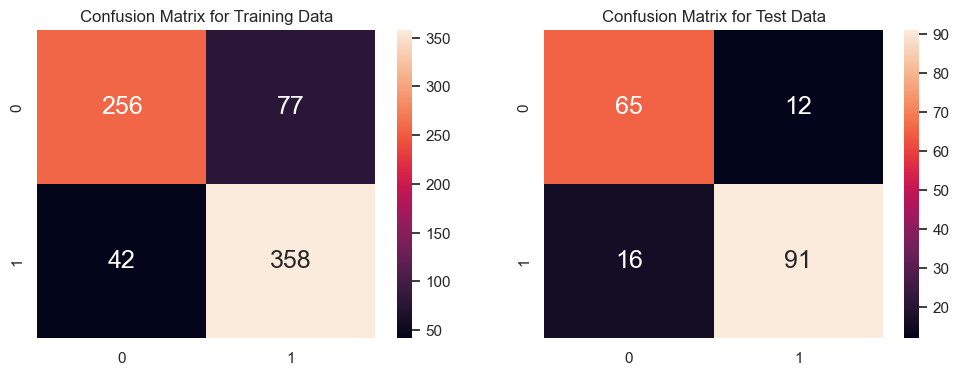

Classification Report

Train Data
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       333
           1       0.82      0.90      0.86       400

    accuracy                           0.84       733
   macro avg       0.84      0.83      0.83       733
weighted avg       0.84      0.84      0.84       733

---------------------------------------------

Test Data
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184




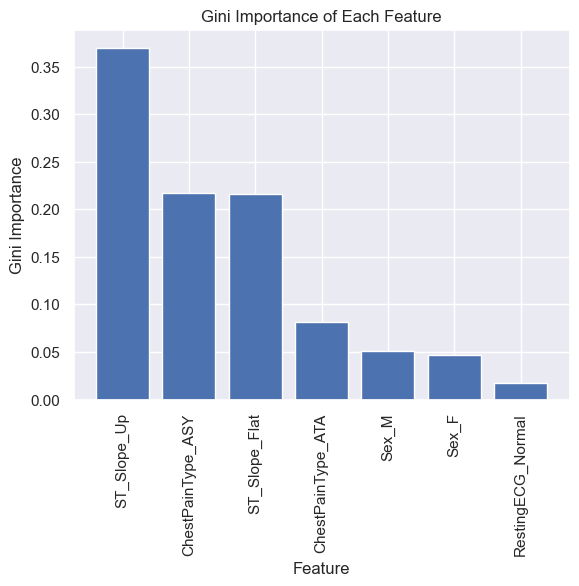

In [31]:
Best_Model_process(IPmedian_heart_df)

## Evaluation of model before and after feature pruning 

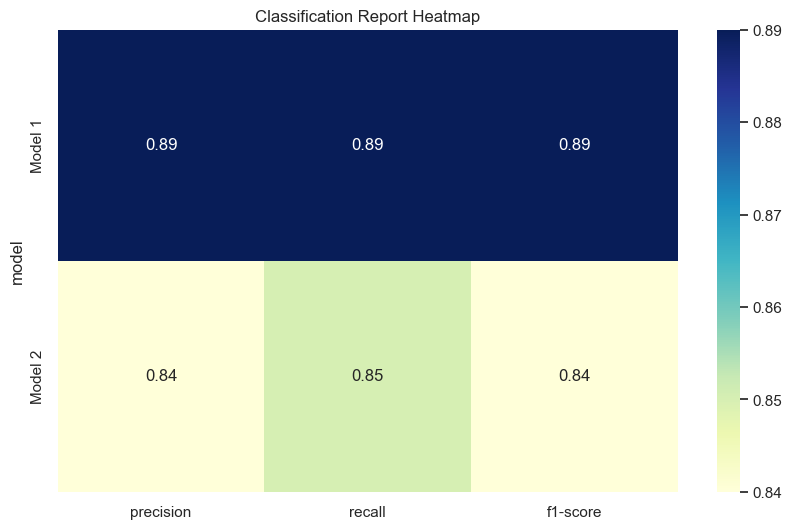

In [32]:
# create a list of all the classification reports

reports = [
    {'model': 'Model 1', 'precision': 0.89, 'recall': 0.89, 'f1-score': 0.89},
    {'model': 'Model 2', 'precision': 0.84, 'recall': 0.85, 'f1-score': 0.84},
    
]

# create a dataframe from the classification reports
df = pd.DataFrame(reports)

# set the model column as the index
df.set_index('model', inplace=True)

# create a heatmap using seaborn
plt.figure(figsize=(10,6))
sb.heatmap(df, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

MODEL 1: IPmedian_heart_df Before feature pruning 

MODEL 2: IPmedian_heart_df After feature pruning 

Even After a 500 trees and a max depth of 4, the random forest still result in a poor result , as seen by the decrease in 0.5
F1 score.

However, **'RestingECG_Normal'** , **'Sex_M'** , **'Sex_F'** , **'ChestPainType_ATA'** , **'ChestPainType_ASY'** , **'ST_Slope_Flat'** and **'ST_Slope_Up'** may still be important features that we can explore in the proceeding machine learning models